In [1]:
import os
import cv2

dataset_path = 'tryponet_set2'
train_norm = 'train/norm'
train_trypo = 'train/trypo'
valid_norm = 'valid/norm'
valid_trypo = 'valid/trypo'

train_data_ratio = 0.1 # ratio of training data

train_norm_path = os.path.join(dataset_path, train_norm)
train_norm_filelist = os.listdir(train_norm_path)
train_norm_filelist = train_norm_filelist[:int(train_data_ratio * len(train_norm_filelist))]

train_trypo_path = os.path.join(dataset_path, train_trypo)
train_trypo_filelist = os.listdir(train_trypo_path)
train_trypo_filelist = train_trypo_filelist[:int(train_data_ratio * len(train_trypo_filelist))]

valid_norm_path = os.path.join(dataset_path, valid_norm)
valid_norm_filelist = os.listdir(valid_norm_path)

valid_trypo_path = os.path.join(dataset_path, valid_trypo)
valid_trypo_filelist = os.listdir(valid_trypo_path)

def get_images(file_list, path):
    return [cv2.imread(os.path.join(path, image)) for image in file_list]

train_norm_images = get_images(train_norm_filelist, train_norm_path)
train_trypo_images = get_images(train_trypo_filelist, train_trypo_path)
valid_norm_images = get_images(valid_norm_filelist, valid_norm_path)
valid_trypo_images = get_images(valid_trypo_filelist, valid_trypo_path)

print(train_norm_images[0])
print(train_trypo_images[0])
print(valid_norm_images[0])
print(valid_trypo_images[0])

[[[231 236 240]
  [230 237 240]
  [230 237 240]
  ..., 
  [230 224 217]
  [230 224 217]
  [230 225 218]]

 [[230 236 240]
  [229 237 239]
  [230 237 240]
  ..., 
  [230 224 217]
  [230 224 217]
  [230 225 218]]

 [[230 236 239]
  [229 236 239]
  [230 237 240]
  ..., 
  [229 224 217]
  [229 224 217]
  [230 225 218]]

 ..., 
 [[ 86 117 139]
  [ 75 108 130]
  [ 67 102 122]
  ..., 
  [ 56  75  83]
  [ 61  78  87]
  [ 58  77  85]]

 [[ 82 113 135]
  [ 71 104 126]
  [ 62  97 117]
  ..., 
  [ 55  74  82]
  [ 56  73  82]
  [ 53  71  80]]

 [[ 79 111 133]
  [ 68 101 123]
  [ 59  94 114]
  ..., 
  [ 55  74  82]
  [ 52  69  78]
  [ 49  68  76]]]
[[[ 74  78  89]
  [138 145 148]
  [148 162 161]
  ..., 
  [147 155 172]
  [190 188 197]
  [184 178 187]]

 [[ 58  80  95]
  [ 90 105 110]
  [140 145 144]
  ..., 
  [132 132 143]
  [167 170 178]
  [179 183 184]]

 [[ 84 107 133]
  [  4  25  44]
  [ 95 113 120]
  ..., 
  [163 163 168]
  [166 165 174]
  [170 171 180]]

 ..., 
 [[221 218 208]
  [194 200 201]


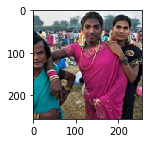

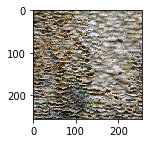

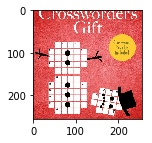

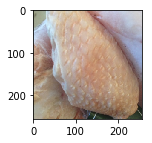

In [2]:
import matplotlib.pyplot as plt

def get_display_image(image):
    plt.figure(figsize=(2, 2))
    plt.imshow(image[:, :, [2, 1, 0]])
    plt.show()

get_display_image(train_norm_images[0])
get_display_image(train_trypo_images[0])
get_display_image(valid_norm_images[0])
get_display_image(valid_trypo_images[0])

In [4]:
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

def process_images(images):
    return np.divide(images, 255)
   
def get_data(norm, trypo):
    norm = process_images(np.array(norm))
    trypo = process_images(np.array(trypo))
    X = np.concatenate([norm, trypo])
    Y1 = np.zeros(len(norm))
    Y2 = np.ones(len(trypo))
    Y = np.concatenate([Y1, Y2])
    Y = np_utils.to_categorical(Y)
    return X, Y
   
X_train, y_train = get_data(train_norm_images, train_trypo_images)
X_val, Y_val = get_data(valid_norm_images, valid_trypo_images)
print(y_train.shape)

(1587, 2)


#### Let's proceed to the baseline neural network.

In [5]:
X_train.shape
X_train[0].shape
x_size, y_size = 256, 256

X_train.shape

(1587, 256, 256, 3)

In [6]:
x_size, y_size = 256, 256
X_train.shape

(1587, 256, 256, 3)

In [12]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(x_size, y_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(24, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 256, 256, 8)       224       
_________________________________________________________________
activation_9 (Activation)    (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 8)       1160      
__________

In [13]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1587/1587 [==============================] - 89s 56ms/step - loss: 0.6375 - acc: 0.6339
Epoch 2/5
1587/1587 [==============================] - 79s 50ms/step - loss: 0.5918 - acc: 0.6534
Epoch 3/5
1587/1587 [==============================] - 81s 51ms/step - loss: 0.5465 - acc: 0.7032
Epoch 4/5
1587/1587 [==============================] - 78s 49ms/step - loss: 0.5224 - acc: 0.7417
Epoch 5/5
1587/1587 [==============================] - 81s 51ms/step - loss: 0.5226 - acc: 0.7278


In [14]:
X_test, y_test = get_data(valid_norm_images, valid_trypo_images)

In [15]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 14s 14ms/step


[0.54848545217514033, 0.73699999999999999]